# SIPLab Decision Making Research/Computational Skills Assessment
Name: 

# Environment Setup

The following commands are only for running this notebook on google colab. Note that if you have a Linux or Mac, the installation to run it locally is very similar.

# Creating a Decision Making Task

To study how humans make decisions, experimentalists distil the question they want to answer into a toy task. In this exercise, we will work on studying _effort based decision making_ a paradigm that examines motivation of a person by determining the amount of effort a person is willing to expend to receive a reward.

The following code uses a Python library called [Psychopy](https://www.psychopy.org/api/index.html#api) to create an experiment. The great feature of this library is the ability to get precise timings of the various screens displayed - a key feature in modelling decision making as you will later see.

For now, run the following code a few times and see if you can choose your preferred option, left or right.

In [4]:
from psychopy import core, visual, event

def get_decision_images(win, decision_data):
    """
    Load and return the images for the decision-making phase.

    Parameters:
    - win: The PsychoPy window where images will be displayed.
    - decision_data: A dictionary containing information about the rewards for each choice.

    Returns:
    - Tuple containing the left and right reward images as PsychoPy ImageStim objects.
    """
    reward_path = "images/{}.png"
    left_reward_image = visual.ImageStim(win, image=reward_path.format(decision_data["left_reward"]))
    right_reward_image = visual.ImageStim(win, image=reward_path.format(decision_data["right_reward"]))
    
    return left_reward_image, right_reward_image

def simple_decision_screen(win, decision_data, config):
    """
    Display a decision screen where users can choose between two options using arrow keys.

    Parameters:
    - win: The PsychoPy window where the decision screen will be displayed.
    - decision_data: A dictionary containing information about the rewards for each choice.
    - config: A dictionary with configuration settings such as max wait time and confirmation time.

    Returns:
    - A dictionary containing the selected key, reaction time, and response ('left' or 'right').
      Students need to implement logic for random choice and highlighting.
    """
    # Load decision images
    left_reward_image, right_reward_image = get_decision_images(win, decision_data)
    
    # Position reward images
    left_reward_image.pos = (-0.5, 0)
    right_reward_image.pos = (0.5, 0)
    
    # Display text prompt
    text = visual.TextStim(win, text="Choose the treasure chest you want", pos=[0, -0.8], color="black", height=0.07)
    
    # List of stimuli to display
    stimuli = [left_reward_image, right_reward_image, text]
    
    # Display stimuli
    for stim in stimuli:
        stim.draw()
    win.flip()
    
    # Wait for user input using left or right arrow keys
    key_pressed = event.waitKeys(keyList=['left', 'right'], maxWait=config["decision"]["max_time"], timeStamped=core.Clock())
    
    if key_pressed:
        selected_key, timestamp = key_pressed[0]
        response = "left" if selected_key == 'left' else "right"
        reaction_time = round(timestamp, 3)
        return {"selected_key": selected_key, "reaction_time": reaction_time, "response": response}

# Example usage
if __name__ == "__main__":
    win = visual.Window(size=[800, 600], color="white", units="norm")
    
    decision_data = {
        "left_reward": 1,
        "right_reward": 2
    }
    
    config = {
        "decision": {
            "max_time": 10,
            "confirmation_time": 3
        },
        "random_state": 42  # Seed for reproducibility in random choice
    }
    
    result = simple_decision_screen(win, decision_data, config)
    
    print(f"Decision Result: {result}")
    
    win.close()

Decision Result: {'selected_key': 'right', 'reaction_time': 2.057, 'response': 'right'}
135.4963 	WARNING 	Monitor specification not found. Creating a temporary one...


Now you should be able to make a decision successfully. However, in many of these decision making experiments, we need to add additional visual components to make it easier for the participants. Sometimes, this can be critical in getting good data to analyze. 

For this exercise, put yourself in the shoes of an experimenter and be thoughtful and aware about the design choices and your implementation of the task. Feel free to consult the Psychopy documentation ([Psychopy](https://www.psychopy.org/api/index.html#api)) and online resources but please do not use AI tools.

To improve participant engagement, please add the following features.

1. Add a picture of the environment (images/effort.jpg) on each side along with the coins. Note that you will need to make a design decision to decide how to place the image. Be thoughtful about this decision. [psychopy.visual.ImageStim](https://www.psychopy.org/api/visual/imagestim.html#psychopy.visual.ImageStim) will be useful here.
2. Automatically select an option if a decision isn't made in time. Note that we will need to log this data somewhere.
3. Highlight the chosen option in green for a bit after the decision is made. [psychopy.visual.RectStim](https://psychopy.org/api/visual/rect.html#psychopy.visual.rect.Rect) will be useful here.

In [ ]:
# Modify this code
import random
def complex_decision_screen(win, decision_data, config):
    # TODO: Implement complex decision screen

    # Load reward images
    left_reward_image, right_reward_image = get_decision_images(win, decision_data)

    # Position reward images
    left_reward_image.pos = (-0.5, -0.4)
    right_reward_image.pos = (0.55, -0.4)
    
    # Load environment images
    left_environment_image = visual.ImageStim(win, image="images/effort.jpg")
    right_environment_image = visual.ImageStim(win, image="images/effort.jpg")

    # Resize environment images 
    left_environment_image.size = (1, 1)
    right_environment_image.size = (1, 1)

    # Position environment images
    left_environment_image.pos = (-0.5, 0.5)
    right_environment_image.pos = (0.5, 0.5)

    # Display text prompt
    text = visual.TextStim(win, text="Choose the treasure chest you want", pos=[0, -0.9], color="black", height=0.07)

    #Create green highlight for chosen option
    left_highlight = visual.Rect(win, width=1, height=1.8, pos=(-0.5,0.1), fillColor="green", opacity=0.5)
    right_highlight = visual.Rect(win, width=1, height=1.8, pos=(0.5,0.1), fillColor="green", opacity=0.5)

    # List of stimuli to display
    stimuli = [left_environment_image, right_environment_image, left_reward_image, right_reward_image, text]
    
    # Display stimuli
    for stim in stimuli:
        stim.draw()
    win.flip()
    
    # Wait for user input using left or right arrow keys
    key_pressed = event.waitKeys(keyList=['left', 'right'], maxWait=config["decision"]["max_time"], timeStamped=core.Clock())

    if key_pressed:
        selected_key, timestamp = key_pressed[0]
        response = "left" if selected_key == 'left' else "right"
        reaction_time = round(timestamp, 3)
        #Display highlight for chosen option
        if selected_key == "left":
            for stim in stimuli:
                stim.draw()
            left_highlight.draw()
            win.flip()
        else:
            for stim in stimuli:
                stim.draw()
            right_highlight.draw()
            win.flip()
    else:
        selected_key = random.choice(['left', 'right'])
        timestamp = config["decision"]["max_time"]
        response = selected_key
        reaction_time = round(timestamp, 3)
    
    return {"selected_key": selected_key, "reaction_time": reaction_time, "response": response}




In [29]:
# Example usage
if __name__ == "__main__":
    win = visual.Window(size=[800, 600], color="white", units="norm")
    
    decision_data = {
        "left_reward": 1,
        "right_reward": 2
    }
    
    config = {
        "decision": {
            "max_time": 10,
            "confirmation_time": 3
        },
        "random_state": 42  # Seed for reproducibility in random choice
    }
    
    result = complex_decision_screen(win, decision_data, config)
    
    print(f"Decision Result: {result}")
    
    win.close()

Decision Result: {'selected_key': 'right', 'reaction_time': 7.859, 'response': 'right'}
82927.8875 	WARNING 	Monitor specification not found. Creating a temporary one...


Wonderful! As of right now, the task asks people to make a decision based on reward. Let's make sure that incorporate effort into the task as well. Remember that you chose the same image for both the left and right options before. Now, let's make sure that the images vary depending on the effort they are associated with. In the images/ folder we have five effort options "effort{i}.jpg".

Pass in the arguments for the effort via the decision_data dictionary. Take a look at the decision data and fill out the following function.

In [26]:
import random
def effort_reward_decision_screen(win, decision_data, config):
    # TODO: Implement effort-reward decision screen

    # Load reward images
    left_reward_image, right_reward_image = get_decision_images(win, decision_data)

    # Position reward images
    left_reward_image.pos = (-0.5, -0.4)
    right_reward_image.pos = (0.55, -0.4)
    
    # Load environment images
    environment_path = "images/effort{}.jpg"
    left_environment_image = visual.ImageStim(win, image=environment_path.format(decision_data["left_effort"]))
    right_environment_image = visual.ImageStim(win, image=environment_path.format(decision_data["right_effort"]))

    # Resize environment images 
    left_environment_image.size = (1, 1)
    right_environment_image.size = (1, 1)

    # Position environment images
    left_environment_image.pos = (-0.5, 0.5)
    right_environment_image.pos = (0.5, 0.5)

    # Display text prompt
    text = visual.TextStim(win, text="Choose the treasure chest you want", pos=[0, -0.9], color="black", height=0.07)

    #Create green highlight for chosen option
    left_highlight = visual.Rect(win, width=1, height=1.8, pos=(-0.5,0.1), fillColor="green", opacity=0.5)
    right_highlight = visual.Rect(win, width=1, height=1.8, pos=(0.5,0.1), fillColor="green", opacity=0.5)

    # List of stimuli to display
    stimuli = [left_environment_image, right_environment_image, left_reward_image, right_reward_image, text]
    
    # Display stimuli
    for stim in stimuli:
        stim.draw()
    win.flip()
    
    # Wait for user input using left or right arrow keys
    key_pressed = event.waitKeys(keyList=['left', 'right'], maxWait=config["decision"]["max_time"], timeStamped=core.Clock())

    if key_pressed:
        selected_key, timestamp = key_pressed[0]
        response = "left" if selected_key == 'left' else "right"
        reaction_time = round(timestamp, 3)
        #Display highlight for chosen option
        if selected_key == "left":
            for stim in stimuli:
                stim.draw()
            left_highlight.draw()
            win.flip()
        else:
            for stim in stimuli:
                stim.draw()
            right_highlight.draw()
            win.flip()
    else:
        selected_key = random.choice(['left', 'right'])
        timestamp = config["decision"]["max_time"]
        response = selected_key
        reaction_time = round(timestamp, 3)
    
    return {"selected_key": selected_key, "reaction_time": reaction_time, "response": response}

In [28]:
# Example usage
if __name__ == "__main__":
    win = visual.Window(size=[800, 600], color="white", units="norm")
    
    decision_data = {
        "left_reward": 1,
        "right_reward": 2,
        "left_effort": 3,
        "right_effort": 4
    }
    
    config = {
        "decision": {
            "max_time": 10,
            "confirmation_time": 3
        },
        "random_state": 42  # Seed for reproducibility in random choice
    }
    
    result = effort_reward_decision_screen(win, decision_data, config)
    
    print(f"Decision Result: {result}")
    
    win.close()

Decision Result: {'selected_key': 'right', 'reaction_time': 4.169, 'response': 'right'}
82919.6081 	WARNING 	Monitor specification not found. Creating a temporary one...


# Analyzing Choices
It's easy to imagine that we could stitch together many of the above trials to get a large amount of data. Let's now try to analyze the options chosen. Take a look at the following data obtained from a fictional experiment.

In [9]:
import pandas as pd
import numpy as np

data = pd.read_csv("decision_data.csv")
data.head()

,left,right,left_effort,right_effort,option_chosen,reaction_time
0,2,2,2,2,right,10.100000
1,2,4,1,5,left,4.299675
2,1,5,2,1,right,1.378819
3,1,5,3,2,right,0.246208
4,3,4,2,3,left,1.227413


Now, plot the distribution of each column and do some exploratory data analysis (play around with the summary statistics of the data).

             left       right  left_effort  right_effort  reaction_time
count  625.000000  625.000000   625.000000    625.000000     625.000000
mean     3.000000    3.000000     3.000000      3.000000       3.152014
std      1.415346    1.415346     1.415346      1.415346       2.291533
min      1.000000    1.000000     1.000000      1.000000       0.166775
25%      2.000000    2.000000     2.000000      2.000000       1.474226
50%      3.000000    3.000000     3.000000      3.000000       2.614097
75%      4.000000    4.000000     4.000000      4.000000       4.487110
max      5.000000    5.000000     5.000000      5.000000      10.100000
left             0
right            0
left_effort      0
right_effort     0
option_chosen    0
reaction_time    0
dtype: int64


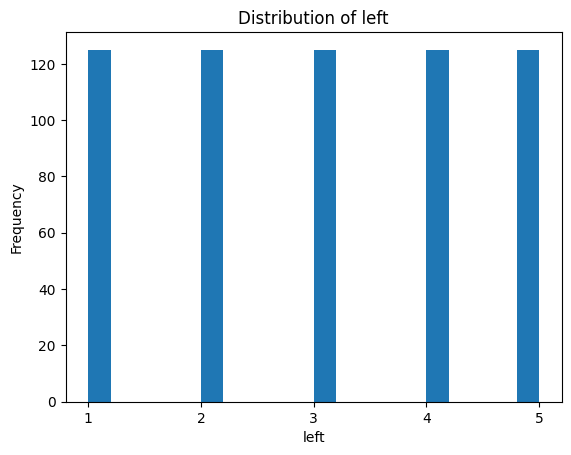

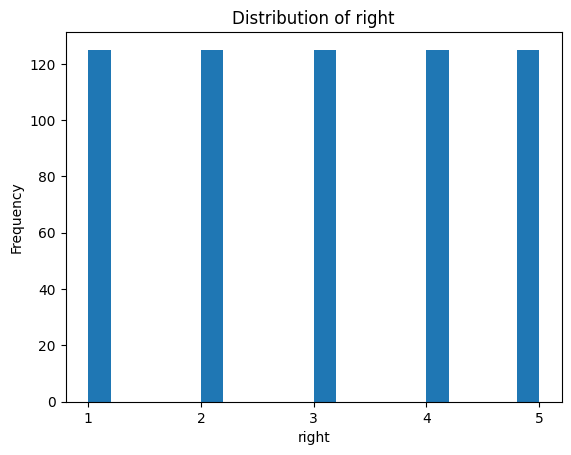

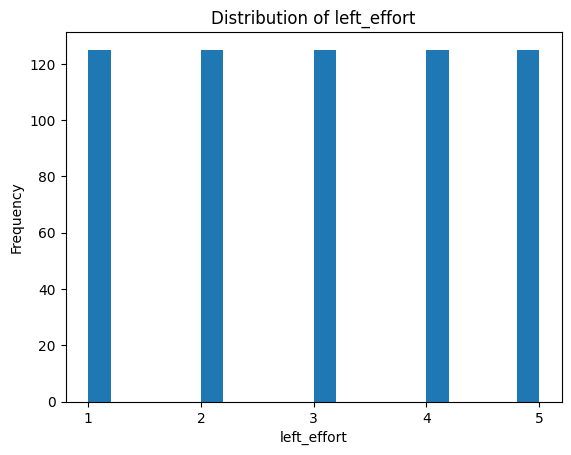

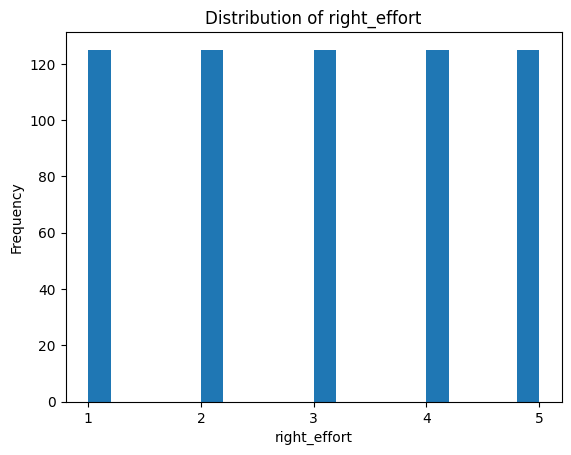

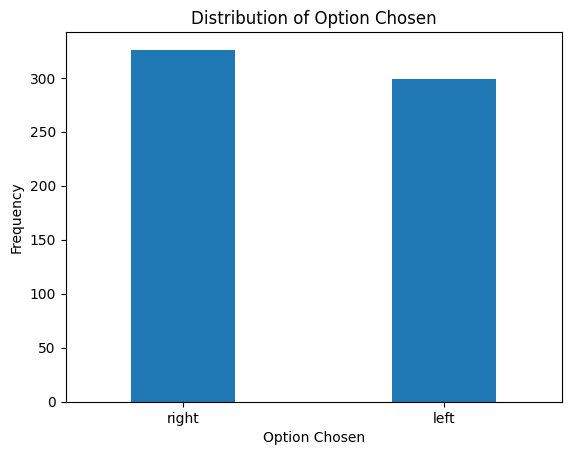

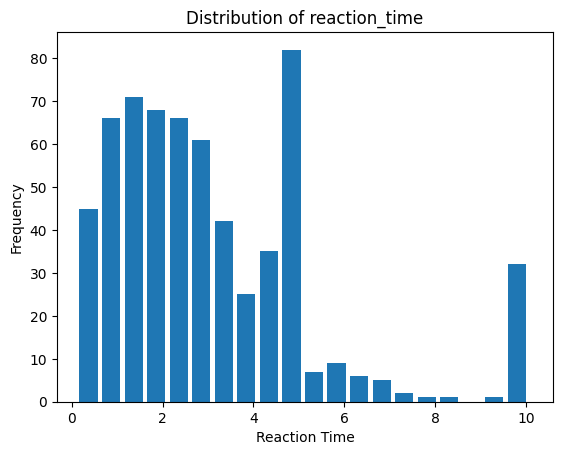

In [10]:
# TODO: Perform exploratory data analysis
import matplotlib.pyplot as plt

#Display summary statistics
print(data.describe())

#Check for missing values
print(data.isnull().sum())

#Create a list for columns with discrete x-values
columns = ["left", "right", "left_effort", "right_effort"]

#Display distribution for columns with discrete x-values
for column in columns:
    plt.hist(data[column], bins=20)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.xticks(np.arange(1, 6))
    plt.show()

#Display distribution for option chosen
option_counts = data['option_chosen'].value_counts()
option_counts.plot(kind='bar', width=0.4)
plt.title('Distribution of Option Chosen')
plt.xlabel('Option Chosen')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

#Display distribution for reaction time
plt.hist(data["reaction_time"], bins=20, width=0.4)
plt.title("Distribution of reaction_time")
plt.xlabel("Reaction Time")
plt.ylabel("Frequency")
plt.show()

Here is a plot that we see commonly in the decision making literature.

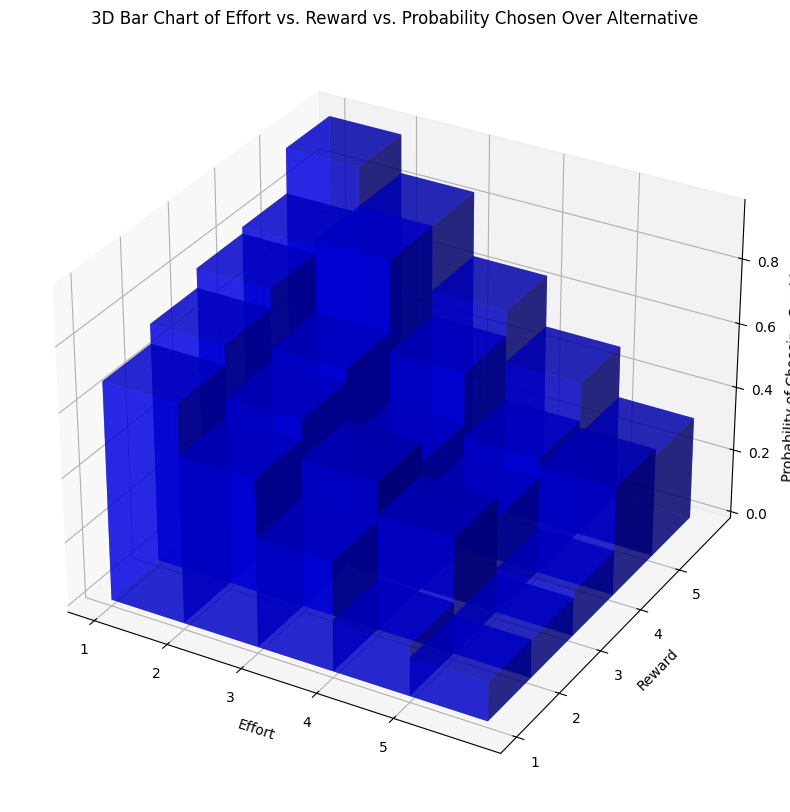

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
decision_data = pd.read_csv('decision_data.csv')

# Calculate counts for each effort-reward combination when chosen
chosen_counts = decision_data.apply(
    lambda row: (row['left_effort'], row['left']) if row['option_chosen'] == 'left' else (row['right_effort'], row['right']), axis=1
).value_counts().reset_index(name='chosen_count')
chosen_counts.columns = ['combination', 'chosen_count']

# Calculate total counts for each effort-reward combination regardless of choice
total_counts = decision_data.apply(
    lambda row: [(row['left_effort'], row['left']), (row['right_effort'], row['right'])], axis=1
).explode().value_counts().reset_index(name='total_count')
total_counts.columns = ['combination', 'total_count']

# Merge and calculate probability of being chosen over the alternative
probability_data = pd.merge(chosen_counts, total_counts, on='combination')
probability_data['probability'] = probability_data['chosen_count'] / probability_data['total_count']

# Extract effort and reward from combination tuples
probability_data[['effort', 'reward']] = pd.DataFrame(probability_data['combination'].tolist(), index=probability_data.index)

# Prepare data for 3D bar plot
x = probability_data['effort']
y = probability_data['reward']
z = np.zeros_like(x)
dx = dy = np.ones_like(x)
dz = probability_data['probability']

# Create a 3D bar plot with increased transparency
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(x, y, z, dx, dy, dz, color='b', alpha=0.6)  # Increased transparency with alpha=0.6

ax.set_xlabel('Effort')
ax.set_ylabel('Reward')
ax.set_zlabel('Probability of Choosing Combination')
ax.set_title('3D Bar Chart of Effort vs. Reward vs. Probability Chosen Over Alternative')

# Set ticks for better readability
ax.set_xticks(np.arange(1, 6))
ax.set_yticks(np.arange(1, 6))

plt.show()

We can clearly see that as effort increases, the probability of an option being chosen goes down. Additionally, we see that as reward increases, the probability of selecting that option goes up. We do certainly have some noise - which is very normal in human experiments.

# Analysis of Decision Data
We can see from the previous plot that there are multiple effort and reward combinations where the individual is _indifferent_ to the two options (where probability of choosing the option is 1/2). In economics, psychology and neuroscience, a way to quantitatively identify this indifference point is via _logistic regression_.

Specifically, we assume that the individual chooses an option that maximizes a decision variable. In the following cells, we assume a relationship where $$Decision\;Variable = DV = \beta_1 Reward - \beta_2 \times  Effort$$ where $\beta_1$ and $\beta_2$ are learned parameters that reflect the cost of the effort relative to reward. Note that this is purely an assumption. This may not be the true relationship between effort and reward.

After assuming a decision variable structure, we fit a model where the probability of choosing an option is a logistic function of the differences of the decision variable. 

$$P(Choose\;Right) = \frac{1}{1 + e^{-DV_{right} + DV_{left}}}$$

The following model fits two parameters $\beta_1$ and $\beta_2$ using scikit-learn's logistic regression model.

In [47]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

# Load the data
decision_data = pd.read_csv('decision_data.csv')

# Define chosen combination
decision_data['combination_chosen'] = decision_data.apply(
    lambda row: (row['left_effort'], row['left']) if row['option_chosen'] == 'left' else (row['right_effort'], row['right']), axis=1)
decision_data['choice_binary'] = decision_data['option_chosen'].apply(lambda x: 1 if x == 'right' else 0)

# Calculate differences for logistic regression
decision_data['reward_diff'] = decision_data['right'] - decision_data['left']
decision_data['effort_diff'] = decision_data['right_effort'] - decision_data['left_effort']

# Features and target
X = decision_data[['reward_diff', 'effort_diff']]
y = decision_data['choice_binary']

# Train and test split
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model
log_reg = LogisticRegression(fit_intercept=False, random_state=42)
log_reg.fit(X_train, y_train)

# Extract coefficients
coefficients = log_reg.coef_[0]
intercept = log_reg.intercept_
beta_1, beta_2 = coefficients
print(intercept[0])
print(f'beta_1 = {beta_1}, beta_2 = {beta_2}')

0.0
beta_1 = 0.5099242768533472, beta_2 = -1.1349657255051842


Now, using the two parameters that we have learned, let's examine how the effort and reward amounts affect the decision probability.

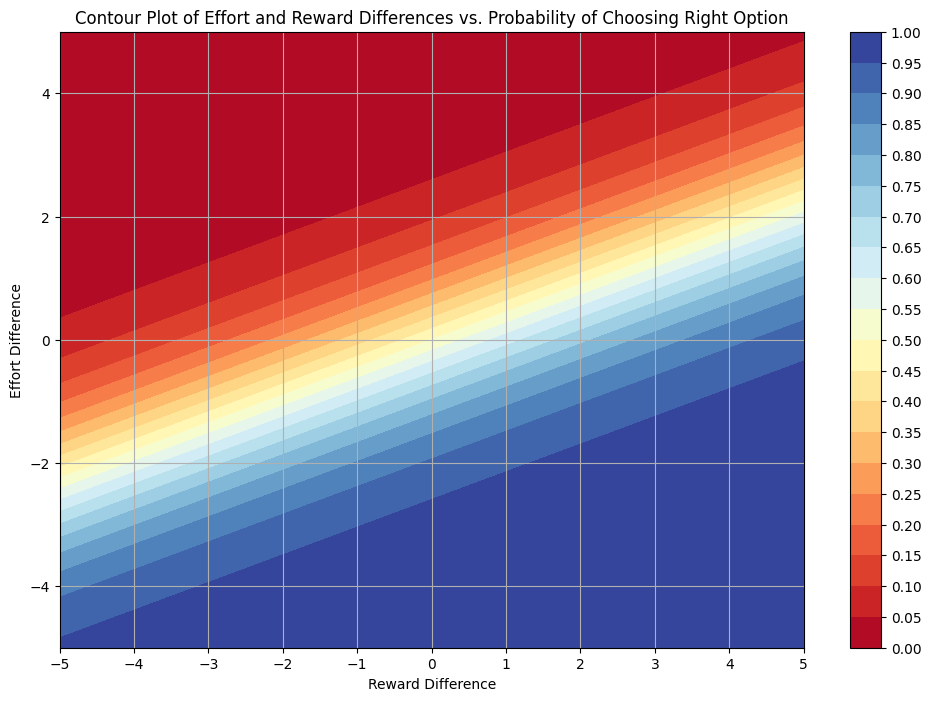

In [44]:
# Plot Effort Reward vs Probability Contour Plot

# Generate grid for plotting

effort_differences = np.linspace(-5, 5, 100)
reward_differences = np.linspace(-5, 5, 100)

effort_diff, reward_diff = np.meshgrid(effort_differences, reward_differences)
decision_variable = beta_1 * reward_diff + beta_2 * effort_diff
predicted_probabilities = 1 / (1 + np.exp(-decision_variable))

# Plot the contour plot
plt.figure(figsize=(12, 8))
levels = np.arange(0, 1.05, 0.05)

# Use the levels in contourf
contour = plt.contourf(reward_diff, effort_diff, predicted_probabilities, levels=levels, cmap='RdYlBu')
plt.grid(True)
# legend range (0, 1)

cbar = plt.colorbar(contour, ticks=levels)
cbar.ax.set_yticklabels(['{:.2f}'.format(i) for i in levels])
plt.xticks(np.arange(int(reward_diff.min()), int(reward_diff.max()) + 1, 1))
plt.xlabel('Reward Difference')
plt.ylabel('Effort Difference')
plt.title('Contour Plot of Effort and Reward Differences vs. Probability of Choosing Right Option')
plt.show()

From the above plot we can see that seems to be a clear effort reward tradeoff. To remain indifferent, how much do we need to increase the reward difference to get a unit increase in effort?

Answer: Around 2 units

Now, let's also visualize the model with respect to the learned decision variables.

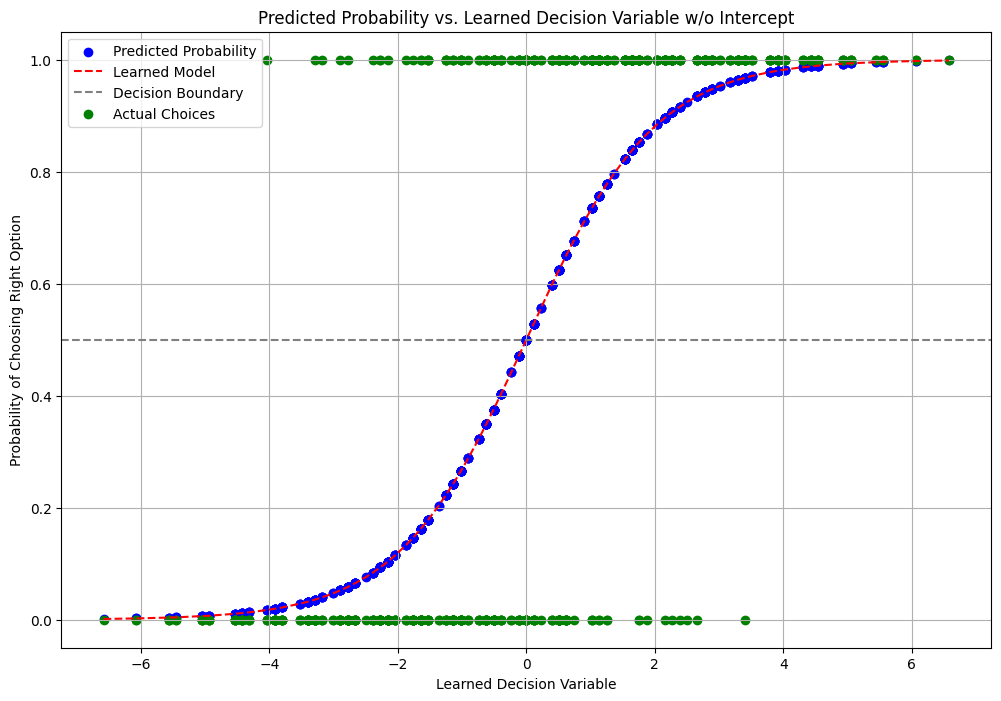

In [32]:
# Plot Predicted Probability vs. Learned Decision Variable
decision_data["learned_decision_variable"] = beta_1 * decision_data["reward_diff"] + beta_2 * decision_data["effort_diff"]
decision_data["predicted_probability"] = 1 / (1 + np.exp(-decision_data["learned_decision_variable"]))

# Plot data points with predicted probabilities and sigmoid function
# Sort the data by the learned decision variable
decision_data = decision_data.sort_values('learned_decision_variable')
plt.figure(figsize=(12, 8))
plt.scatter(decision_data["learned_decision_variable"], decision_data["predicted_probability"], color='b', label='Predicted Probability')
plt.plot(decision_data["learned_decision_variable"], decision_data["predicted_probability"], color='r', linestyle='dashed', label='Learned Model')
plt.axhline(y=0.5, color='gray', linestyle='dashed', label='Decision Boundary')
# Plot actual data points
plt.scatter(decision_data["learned_decision_variable"], decision_data["choice_binary"], color='g', label='Actual Choices')
plt.xlabel('Learned Decision Variable')
plt.ylabel('Probability of Choosing Right Option')
plt.title('Predicted Probability vs. Learned Decision Variable w/o Intercept')
plt.legend()
plt.grid(True)
plt.show()


Great! Now let's have you get some practice. Fit a similar logistic regression model, but this time, assume that

$P(Choose\;Right) = \frac{1}{1 + e^{\beta_0 -DV_{right} + DV_{left}}}$  

Note that the decision variable is the same as last time. The only change is that we have an additional intercept term, $\beta_0$ to fit. Use the same set of code from last time but remember to rename variables and  the axes. Look at the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to see how to do this.


In [33]:
# TODO: Learn the model and beta coefficients using the data
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

# Load the data
decision_data = pd.read_csv('decision_data.csv')

# Define chosen combination
decision_data['combination_chosen'] = decision_data.apply(
    lambda row: (row['left_effort'], row['left']) if row['option_chosen'] == 'left' else (row['right_effort'], row['right']), axis=1)
decision_data['choice_binary'] = decision_data['option_chosen'].apply(lambda x: 1 if x == 'right' else 0)

# Calculate differences for logistic regression
decision_data['reward_diff'] = decision_data['right'] - decision_data['left']
decision_data['effort_diff'] = decision_data['right_effort'] - decision_data['left_effort']

# Features and target
X = decision_data[['reward_diff', 'effort_diff']]
y = decision_data['choice_binary']

# Train and test split
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model with intercept
log_reg = LogisticRegression(fit_intercept=True, random_state=42)
log_reg.fit(X_train, y_train)

# Extract coefficients and intercept
intercept = log_reg.intercept_[0]
coefficients = log_reg.coef_[0]
beta_0 = intercept
beta_1, beta_2 = coefficients
print(f'beta_0 = {beta_0}, beta_1 = {beta_1}, beta_2 = {beta_2}')

beta_0 = 0.0787033657888333, beta_1 = 0.5105459056161687, beta_2 = -1.1358202307026875


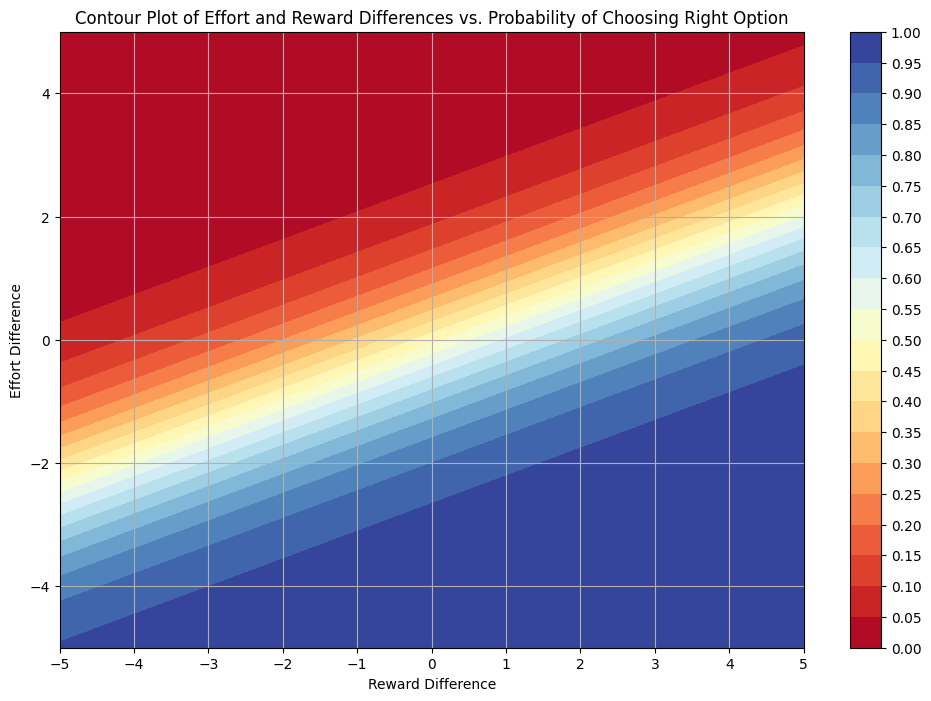

In [34]:
# TODO: Plot the contour plot of effort and reward differences vs. probability of choosing the right option
# Plot Effort Reward vs Probability Contour Plot

# Generate grid for plotting

effort_differences = np.linspace(-5, 5, 100)
reward_differences = np.linspace(-5, 5, 100)

effort_diff, reward_diff = np.meshgrid(effort_differences, reward_differences)
decision_variable = beta_1 * reward_diff + beta_2 * effort_diff
predicted_probabilities = 1 / (1 + np.exp(beta_0 - decision_variable))

# Plot the contour plot
plt.figure(figsize=(12, 8))
levels = np.arange(0, 1.05, 0.05)

# Use the levels in contourf
contour = plt.contourf(reward_diff, effort_diff, predicted_probabilities, levels=levels, cmap='RdYlBu')
plt.grid(True)
# legend range (0, 1)

cbar = plt.colorbar(contour, ticks=levels)
cbar.ax.set_yticklabels(['{:.2f}'.format(i) for i in levels])
plt.xticks(np.arange(int(reward_diff.min()), int(reward_diff.max()) + 1, 1))
plt.xlabel('Reward Difference')
plt.ylabel('Effort Difference')
plt.title('Contour Plot of Effort and Reward Differences vs. Probability of Choosing Right Option')
plt.show()

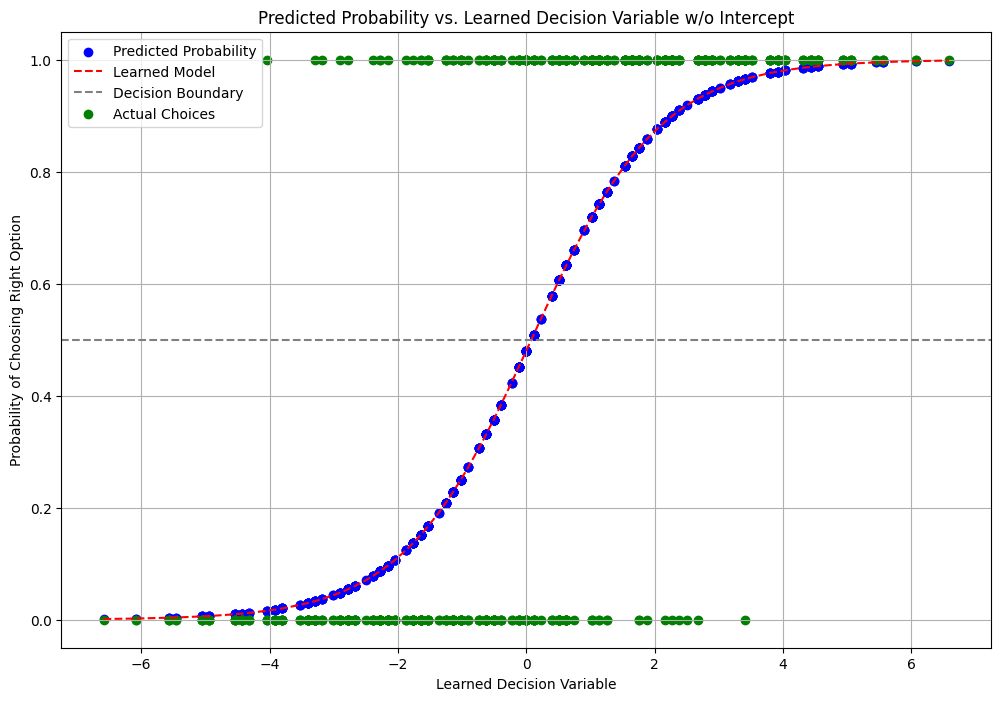

In [35]:
# TODO: Plot the predicted probability vs. learned decision variable with actual choices
# Plot Predicted Probability vs. Learned Decision Variable
decision_data["learned_decision_variable"] = beta_1 * decision_data["reward_diff"] + beta_2 * decision_data["effort_diff"]
decision_data["predicted_probability"] = 1 / (1 + np.exp(beta_0 - decision_data["learned_decision_variable"]))

# Plot data points with predicted probabilities and sigmoid function
# Sort the data by the learned decision variable
decision_data = decision_data.sort_values('learned_decision_variable')
plt.figure(figsize=(12, 8))
plt.scatter(decision_data["learned_decision_variable"], decision_data["predicted_probability"], color='b', label='Predicted Probability')
plt.plot(decision_data["learned_decision_variable"], decision_data["predicted_probability"], color='r', linestyle='dashed', label='Learned Model')
plt.axhline(y=0.5, color='gray', linestyle='dashed', label='Decision Boundary')
# Plot actual data points
plt.scatter(decision_data["learned_decision_variable"], decision_data["choice_binary"], color='g', label='Actual Choices')
plt.xlabel('Learned Decision Variable')
plt.ylabel('Probability of Choosing Right Option')
plt.title('Predicted Probability vs. Learned Decision Variable w/o Intercept')
plt.legend()
plt.grid(True)
plt.show()

Good work! We now have two models that have fit the data. George Box, a famous statistician once said, "All models are wrong; some are useful." How do we pick the right one?

This is where _model selection_ comes into play. We need to choose the better model according to a validation set. (Note that this is **not** the test set). We can only use the test set once otherwise it no longer stays a test set.

Specifically, let's use the Bayesian Information Criterion to choose the better model.

$$BIC = k ln (n) - 2 ln(L)$$ 

Here, $k$ is the number of parameters we learn for the model, $n$ is the number of observation in the validation set and $L$ is the likelihood of the model.

For both models, split the training set into a training set and validation set, fit the model on the training set and calculate the BIC on the validation set for each model. Note that lower is better! Use the BIC function I have provided

In [36]:
from sklearn.metrics import log_loss

def BIC(k, data, labels, model):
    n = len(data)
    log_likelihood = -log_loss(labels, model.predict_proba(data))
    return k * np.log(n) - 2 * log_likelihood

In [38]:
# TODO: Calculate BIC scores for both models
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

# Load the data
decision_data = pd.read_csv('decision_data.csv')

# Define chosen combination
decision_data['combination_chosen'] = decision_data.apply(
    lambda row: (row['left_effort'], row['left']) if row['option_chosen'] == 'left' else (row['right_effort'], row['right']), axis=1)
decision_data['choice_binary'] = decision_data['option_chosen'].apply(lambda x: 1 if x == 'right' else 0)

# Calculate differences for logistic regression
decision_data['reward_diff'] = decision_data['right'] - decision_data['left']
decision_data['effort_diff'] = decision_data['right_effort'] - decision_data['left_effort']

# Features and target
X = decision_data[['reward_diff', 'effort_diff']]
y = decision_data['choice_binary']

# Train and test split
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Split the training set into training and validation sets
X_train_sub, X_validation, y_train_sub, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit logistic regression model without intercept
log_reg_no_intercept = LogisticRegression(fit_intercept=False, random_state=42)
log_reg_no_intercept.fit(X_train_sub, y_train_sub)

# Fit logistic regression model with intercept
log_reg_intercept = LogisticRegression(fit_intercept=True, random_state=42)
log_reg_intercept.fit(X_train_sub, y_train_sub)

#Calculate and display the BIC for each model
bic_no_intercept = BIC(2, X_validation, y_validation, log_reg_no_intercept)
bic_intercept = BIC(3, X_validation, y_validation, log_reg_intercept)
print(f"The BIC for the model without an intercept is: {bic_no_intercept}")
print(f"The BIC for the model with an intercept is: {bic_intercept}")

The BIC for the model without an intercept is: 10.245867142298037
The BIC for the model with an intercept is: 14.84926298399661


Which is the better model? And why?

Answer: The BIC for the model without an intercept is lower, which means that it performs better. I honestly expected the model with an intercept would perform better because the addition of a parameter will provide a better fit, but it seems that the greater k term weighs more penalty.

Now, retrain the model on the training set and validation set combined and calculate the AUC-ROC score on the test set which evaluates the ability of the model to distinguish between picking right or left. Refer to [sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) to see how to do this.

In [48]:

# Fit logistic regression model without intercept
log_reg = LogisticRegression(fit_intercept=False, random_state=42)
log_reg.fit(X_train, y_train)

#Calculate and display the AUC-ROC score
auc_roc_score = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
print(f"The AUC-ROC score is: {auc_roc_score}")


The AUC-ROC score is: 0.9135706914344687


# Software Engineering

Well done, you are almost at the end. 

Though our research answers important neuroscience, economics and psychology research questions, we rely heavily on software engineering to both implement our tasks and analyze our data.

Learning how to test, document and refactor code is critical to minimize catastrophic careless errors. In general, a software engineering rule of thumb is to spend 15% of your programming time refactoring code.

## Automated Tests

Credit: Kyle Johnsen

One way we do this is with automated tests. Write tests (using assert statements) for the following function. In real software (using pytest), we would put the test function in a test file, would be run automatically by simply calling pytest from the command line.

In [50]:
import numpy as np
# TODO: Implement automated test
def axial_distance(source_xyz: list, target_xyz: list, dir_xyz: list) -> float:
    """Calculates the axial distance between two points in a given direction.
    Args:
        source_xyz (list): The source point in cartesian coordinates.
        target_xyz (list): The target point in cartesian coordinates.
        dir_xyz (list): The direction in which to calculate the distance.
    Returns:
        float: The axial distance between the source and target points.
    """
    dir_normalized = np.divide(dir_xyz, np.linalg.norm(dir_xyz))
    source_to_target = np.subtract(target_xyz, source_xyz)
    axial_distance = np.dot(source_to_target, dir_normalized)
    return axial_distance

def test_axial_distance():
    assert axial_distance([0, 0, 0], [1, 0, 0], [1, 0, 0]) == 1
    # TODO: write more tests and explain why that test case was chose
    #Does not catch arithmetic exception when direction vector is [0, 0, 0]
    assert axial_distance([0, 0, 0], [0, 0, 0], [0, 0, 0])
    #Source and target points are the same, distance should always be 0
    assert axial_distance([0, 0, 0], [0, 0, 0], [10, 2, 4]) == 0
    #Direction vector does not align with the source_to_target vector
    assert axial_distance([0, 0, 0], [1, 0, 0], [0, 1, 0]) == 0
    #Source_to_target vector has magnitude in all directions and direction vector only has magnitude in one direction
    assert axial_distance([0, 0, 0], [1, 2, 3], [0, 0, 1]) == 3

test_axial_distance()

C:\Users\Terry\AppData\Local\Temp\ipykernel_34496\1907595170.py:12: RuntimeWarning: invalid value encountered in divide
  dir_normalized = np.divide(dir_xyz, np.linalg.norm(dir_xyz))


## Refactoring
Please refactor your entire code for this notebook.[Here](https://en.wikipedia.org/wiki/Zen_of_Python) is some inspiration for that. Yes, that may seem like a daunting task but take a break and come back to it. Refactoring allows you to refine your work to make it more intelligible and understandable for others (and yourself). Research never happens in a vacuum and it is important to not silo yourself off because of bad code.

Other resources are below.

https://docs.python-guide.org/writing/style/

https://testdriven.io/blog/clean-code-python/

Great job! Now, save your work and send an email to me (vivekanand@gatech.edu) with a link to your completed colab notebook.